# Movimento de projéteis e o efeito da resistência do ar em duas dimensões

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Introdução

Em um lançamento de projéteis em duas dimensões, o movimento pode ser descomposto no movimento nas duas direções, cujas equações do movimento são:

$$m \frac{d^2 x}{d t^2} = F_{R,x}$$

$$m \frac{d^2 y}{d t^2} = F_{R,y}$$

onde $F_{R,i}$ é a força resultante na direção $i = (x,y)$. Na ausência da resistência do ar tem-se $F_{R,x} = 0$ e $F_{R,y} = P$, onde $P$ é o peso do corpo. Se houver resistência do ar, a força resultante precisa incluir o efeito da resistência do ar $F_{R,i} \rightarrow F_{R,i} + F_{ar,i}$, onde $F_{ar}$ é a componente na direção $i$ da força da resistência do ar. Dos problemas anteriores, sabe-se que força de resistência do ar aponta na direção oposta da velocidade $\vec{v}$ do corpo, e é dada por: 

$$\vec{F}_{ar} = - B_2 v^2 \hat{v}$$

onde $B_2 = C \rho A/2$. Temos, portanto, um problema de duas equações diferenciais ordinárias de 2a. ordem. Uma forma conveniente de resolver o problema e transformar cada uma das EDOs de 2a. ordem em duas EDOs de primeira ordem. Desta forma, tem-se:


$$\frac{d x}{d t} = v_x$$

$$\frac{d v_x}{d t} = - \frac{B_2}{m} v v_x$$

$$\frac{d y}{d t} = v_y$$

$$\frac{d v_y}{d t} = -g - \frac{B_2}{m} v v_y$$

$$v = \sqrt{v_x^2 + v_y^2}$$


## Solução analítica sem resistência do ar

A soluação analítica para o problema acima sem a resistência do ar é:

$$x = x_0 + (v_0 \cos \theta) t $$

$$v_x = v_0 \cos \theta $$

$$y = y_0 + (v_0 \sin \theta) t - \frac{g t^2}{2} $$

$$v_y = v_0 \sin \theta - g t $$



## Solução numérica

A solução numérica das equações diferenciais acima, requer que a discretização das derivadas $d v / dt$ e $d x/dt$. Assumindo a derivada progressiva, tem-se:

$$\frac{d x}{dt} \approx \frac{x(t+\Delta t) - x(t)}{\Delta t}$$

$$\frac{d v}{dt} \approx \frac{v(t+\Delta t) - v(t)}{\Delta t}$$

Sendo assim, a forma discretizada das esquações diferenciais sem e com o efeito da resistência do ar tornam-se:

$$x_{i+1} = x_i + v_{x,i} \Delta t$$

$$v_{x,i+1} = v_{x,i} \left(1 - \frac{B_2}{m} v_i \Delta t \right) $$

$$y_{i+1} = y_i + v_{y,i} \Delta t$$

$$v_{y,i+1} = v_{y,i} \left(1 - \frac{B_2}{m} v_i \Delta t \right) - g \Delta t$$

$$v_i = \sqrt{v_{x,i}^2 + v_{y,i}^2}$$

## Código

O código abaixo resolve as equação diferencial do movimento de projéteis e compara com a solução analítica sem a resistência do ar.

In [7]:
# loading libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# assigning input variables

dt = 0.1          # time step increment
nt = 200          # number of time steps

x0 = 0            # in m (initial x coordinate)
y0 = 0            # in m (initial y coordinate)
v0 = 150.0          # in m/s (initial velocity)
theta = 30        # in degrees (angle of launch)
mass = 1          # in kg (projectile mass)
g = 9.81          # in m/s^2 (gravity acceleration)

rho = 1.225       # in kg/m^3 (air density)
C = 0.1           # aerodynamic parameter
A = 0.1           # in m^2 (area cross-section)

B2 = C*rho*A/2    # auxiliary constant
cte = B2/mass     # auxiliary constant

Tmax = (nt-1)*dt  # this is not an input variable
                  # it only calculates the total time 
        

In [9]:
# defining a function that calculates the whole 
# time iteration of the diffencial equation 

def ProjectileMotion(t,x0,y0,v0,theta,b2m):

    nsteps = len(t)  # find the number of time steps
    
    dt = t[1] - t[0] # dt definition
    
    # array creation for all quantities
    x = np.zeros(nsteps)    # array of x coordinates    
    y = np.zeros(nsteps)    # array of y coordinates 
    vx = np.zeros(nsteps)   # array of vx component with resist  
    vy = np.zeros(nsteps)   # array of vy component with resist
    v  = np.zeros(nsteps)   # array of sqrt(vx^2+vy^2) component 

    # defining initial conditions
    x[0] = x0
    y[0] = y0
    v[0] = v0
    vx[0] = v0*np.cos(np.pi*theta/180)  # cosine function only 
    vy[0] = v0*np.sin(np.pi*theta/180)  # takes arguments in radian

    # iterating loop starting at second array position 
    for i in range(1,nsteps):
        x[i] = x[i-1] + vx[i-1]*dt
        y[i] = y[i-1] + vy[i-1]*dt
        vx[i] = vx[i-1]*(1 - b2m*v[i-1]*dt)
        vy[i] = vy[i-1]*(1 - b2m*v[i-1]*dt) - g*dt
        v[i] = np.sqrt(vx[i]**2 + vy[i]**2)
    
    return x,y,vx,vy,v


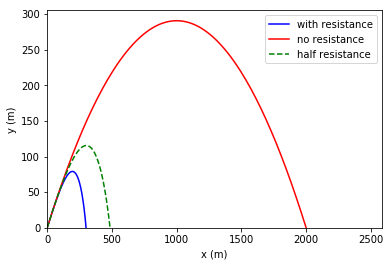

In [11]:
# array of time steps t_i (all filled with zeros)
time = np.linspace(0,Tmax,nt)

# calculating the solution WITH the air resistance
x,y,vx,vy,v = ProjectileMotion(time,x0,y0,v0,theta,B2/mass)

# calculating the solution WITH half air resistance
x1,y1,vx1,vy1,v1 = ProjectileMotion(time,x0,y0,v0,theta,0.5*B2/mass)

# calculating the solution WITHOUT the air resistance
xx,yy,vvx,vvy,vv = ProjectileMotion(time,x0,y0,v0,theta,0)

plt.plot(x,y,'b-',xx,yy,'r-',x1,y1,'g--')
plt.axis([0, np.max(xx), 0, 1.05*np.max(yy)])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(['with resistance','no resistance','half resistance'])
plt.show()

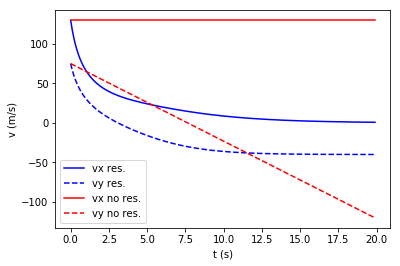

In [12]:
plt.plot(time,vx,'b-',time,vy,'b--',time,vvx,'r-',time,vvy,'r--',)
plt.xlabel('t (s)')
plt.ylabel('v (m/s)')
plt.legend(['vx res.','vy res.','vx no res.','vy no res.'])
plt.show()